In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
head_url = 'https://labs.data.gov/dashboard/offices/detail/'
tail_url = '/2020-06-30'

In [3]:
deprt = {
    'Emp Opp Cmsn':48032,
    'Prsnl Mngmnt':48112,
    'Business Admn':48139,
    'Agriculture':49015,
    'Education':49018,
    'Energy':49019,
    'Health':49021,
    'Securty':49022,
    'Urbn Dvlpmnt':49023,
    'Labor':49028,
    'State':49030,
    'Interior':49033,
    'Treasury':49034,
    'Insurance':49043,
    'Trade Cmsn':49047,
    'Gnrl Admin':49048,
    'Pension':49052,
    'Social Security':49057,
    'Financial':49113,
    'Defense':49229,
    'Aeronautics':49476,
    'U.S. Trade Cmsn':49712,
    'U.S. Dvlpmnt':52583,
    'Housing Finance':52611,
    'Prtction Board':52630,
    'Humanities':52636,
    'Science':52640,
    'Nuclear':52645,
    'Commerce':52668,
    'Justice':52686
}

In [4]:
print(len(deprt))

30


In [7]:
data = []
for k,v in deprt.items():
    url = head_url + str(v) + tail_url
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        datasets1 = soup.find_all('td', id="pdl_datasets")
        datasets_value = [d.text.strip() for d in datasets1]
        
        restricted_public_datasets1 = soup.find_all('td', id="pdl_access_restricted")
        restricted_public_datasets_value = [d.text.strip() for d in restricted_public_datasets1]
        
        public_datasets1 = soup.find_all('td', id="pdl_access_public")
        public_datasets_value = [d.text.strip() for d in public_datasets1]
        
        non_public_datasets1 = soup.find_all('td', id="pdl_access_nonpublic")
        non_public_datasets_value = [d.text.strip() for d in non_public_datasets1]
        
        total_API1 = soup.find_all('td', id="pdl_apis")
        total_API_value = [d.text.strip() for d in total_API1]
        
        restricted_public_API1 = soup.find_all('td', id="pdl_api_access_restricted")
        restricted_public_API_value = [d.text.strip() for d in restricted_public_API1]
        
        public_API1 = soup.find_all('td', id="pdl_api_access_public")
        public_API_value = [d.text.strip() for d in public_API1]
        
        non_public_API1 = soup.find_all('td', id="pdl_api_access_nonpublic")
        non_public_API_value = [d.text.strip() for d in non_public_API1]
        
        temp = list(zip(
            datasets_value, 
            restricted_public_datasets_value,
            public_datasets_value, 
            non_public_datasets_value, 
            total_API_value, 
            restricted_public_API_value,
            public_API_value, 
            non_public_API_value
        ))
        
        data += temp

print('data =',data)
print('\nLength =',len(data))        

data = [('136', '0', '136', '0', '0', '0', '0', '0'), ('682', '56', '583', '43', '6', '0', '6', '0'), ('916', '1', '886', '29', '32', '0', '5', '27'), ('1756', '3', '1576', '177', '10', '0', '10', '0'), ('488', '31', '455', '2', '1', '0', '1', '0'), ('450', '182', '262', '6', '176', '170', '6', '0'), ('1718', '18', '1700', '0', '43', '0', '43', '0'), ('1005', '22', '693', '290', '0', '0', '0', '0'), ('172', '21', '151', '0', '34', '0', '34', '0'), ('239', '1', '235', '3', '76', '0', '76', '0'), ('371', '0', '371', '0', '0', '0', '0', '0'), ('47002', '1412', '45590', '0', '62', '0', '62', '0'), ('277', '0', '277', '0', '0', '0', '0', '0'), ('6', '0', '6', '0', '0', '0', '0', '0'), ('95', '0', '95', '0', '2', '0', '2', '0'), ('256', '1', '241', '14', '5', '1', '4', '0'), ('10', '0', '10', '0', '0', '0', '0', '0'), ('2033', '99', '1457', '477', '7', '0', '7', '0'), ('2', '0', '2', '0', '2', '0', '2', '0'), ('177', '0', '177', '0', '0', '0', '0', '0'), ('27099', '366', '26732', '1', '0', '

In [8]:
Datasets = [i[0] for i in data]
print('Datasets =',Datasets)
print('\nLength =',len(Datasets))

Datasets = ['136', '682', '916', '1756', '488', '450', '1718', '1005', '172', '239', '371', '47002', '277', '6', '95', '256', '10', '2033', '2', '177', '27099', '29', '1179', '2', '1', '47', '173', '37', '39100', '1223']

Length = 30


In [9]:
Restricted_Public_Datasets = [i[1] for i in data]
print('Restricted_Public_Datasets =',Restricted_Public_Datasets)
print('\nLength =',len(Restricted_Public_Datasets))

Restricted_Public_Datasets = ['0', '56', '1', '3', '31', '182', '18', '22', '21', '1', '0', '1412', '0', '0', '0', '1', '0', '99', '0', '0', '366', '0', '7', '0', '0', '0', '1', '0', '31', '445']

Length = 30


In [10]:
Public_Datsets = [i[2] for i in data]
print('Public_Datsets =',Public_Datsets)
print('\nLength =',len(Public_Datsets))

Public_Datsets = ['136', '583', '886', '1576', '455', '262', '1700', '693', '151', '235', '371', '45590', '277', '6', '95', '241', '10', '1457', '2', '177', '26732', '29', '1170', '2', '1', '47', '166', '34', '39068', '778']

Length = 30


In [11]:
Non_Public_Datasets = [i[3] for i in data]
print('Non_Public_Datasets =',Non_Public_Datasets)
print('\nLength =',len(Non_Public_Datasets))

Non_Public_Datasets = ['0', '43', '29', '177', '2', '6', '0', '290', '0', '3', '0', '0', '0', '0', '0', '14', '0', '477', '0', '0', '1', '0', '2', '0', '0', '0', '6', '3', '1', '0']

Length = 30


In [12]:
Total_API = [i[4] for i in data]
print('Total_API =',Total_API)
print('\nLength =',len(Total_API))

Total_API = ['0', '6', '32', '10', '1', '176', '43', '0', '34', '76', '0', '62', '0', '0', '2', '5', '0', '7', '2', '0', '0', '3', '2', '0', '0', '0', '3', '0', '8', '6']

Length = 30


In [13]:
Restricted_Public_API = [i[5] for i in data]
print('Restricted_Public_API =',Restricted_Public_API)
print('\nLength =',len(Restricted_Public_API))

Restricted_Public_API = ['0', '0', '0', '0', '0', '170', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1']

Length = 30


In [14]:
Public_API = [i[6] for i in data]
print('Public_API =',Public_API)
print('\nLength =',len(Public_API))

Public_API = ['0', '6', '5', '10', '1', '6', '43', '0', '34', '76', '0', '62', '0', '0', '2', '4', '0', '7', '2', '0', '0', '3', '2', '0', '0', '0', '3', '0', '8', '5']

Length = 30


In [15]:
Non_Public_API = [i[7] for i in data]
print('Non_Public_API =',Non_Public_API)
print('\nLength =',len(Non_Public_API))

Non_Public_API = ['0', '0', '27', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

Length = 30


In [16]:
Departments = [k for k,v in deprt.items()]
print('Departments =',Departments)
print('\nLength',len(Departments))

Departments = ['Emp Opp Cmsn', 'Prsnl Mngmnt', 'Business Admn', 'Agriculture', 'Education', 'Energy', 'Health', 'Securty', 'Urbn Dvlpmnt', 'Labor', 'State', 'Interior', 'Treasury', 'Insurance', 'Trade Cmsn', 'Gnrl Admin', 'Pension', 'Social Security', 'Financial', 'Defense', 'Aeronautics', 'U.S. Trade Cmsn', 'U.S. Dvlpmnt', 'Housing Finance', 'Prtction Board', 'Humanities', 'Science', 'Nuclear', 'Commerce', 'Justice']

Length 30


In [17]:
table = {
    'Departments': Departments,
    'Datasets': Datasets,
    'Restricted_Public_Datasets': Restricted_Public_Datasets,
    'Public_Datsets': Public_Datsets,
    'Non_Public_Datasets': Non_Public_Datasets,
    'Total_API': Total_API,
    'Restricted_Public_API': Restricted_Public_API,
    'Public_API': Public_API,
    'Non_Public_API': Non_Public_API
}

In [18]:
with open('table.json', 'w') as file:
    json.dump(table, file, indent=4)

In [19]:
with open('table.json', 'r') as f:
    records = json.load(f)

In [20]:
data_frame = pd.DataFrame(records)
data_frame

,Departments,Datasets,Restricted_Public_Datasets,Public_Datsets,Non_Public_Datasets,Total_API,Restricted_Public_API,Public_API,Non_Public_API
0,Emp Opp Cmsn,136,0,136,0,0,0,0,0
1,Prsnl Mngmnt,682,56,583,43,6,0,6,0
2,Business Admn,916,1,886,29,32,0,5,27
3,Agriculture,1756,3,1576,177,10,0,10,0
4,Education,488,31,455,2,1,0,1,0
5,Energy,450,182,262,6,176,170,6,0
6,Health,1718,18,1700,0,43,0,43,0
7,Securty,1005,22,693,290,0,0,0,0
8,Urbn Dvlpmnt,172,21,151,0,34,0,34,0
9,Labor,239,1,235,3,76,0,76,0


In [21]:
data_frame.dtypes

Departments                   object
Datasets                      object
Restricted_Public_Datasets    object
Public_Datsets                object
Non_Public_Datasets           object
Total_API                     object
Restricted_Public_API         object
Public_API                    object
Non_Public_API                object
dtype: object

In [22]:
data_frame['Datasets'] = data_frame['Datasets'].astype(int)
data_frame['Restricted_Public_Datasets'] = data_frame['Restricted_Public_Datasets'].astype(int)
data_frame['Public_Datsets'] = data_frame['Public_Datsets'].astype(int)
data_frame['Non_Public_Datasets'] = data_frame['Non_Public_Datasets'].astype(int)
data_frame['Total_API'] = data_frame['Total_API'].astype(int)
data_frame['Restricted_Public_API'] = data_frame['Restricted_Public_API'].astype(int)
data_frame['Public_API'] = data_frame['Public_API'].astype(int)
data_frame['Non_Public_API'] = data_frame['Non_Public_API'].astype(int)

In [23]:
data_frame.dtypes

Departments                   object
Datasets                       int32
Restricted_Public_Datasets     int32
Public_Datsets                 int32
Non_Public_Datasets            int32
Total_API                      int32
Restricted_Public_API          int32
Public_API                     int32
Non_Public_API                 int32
dtype: object

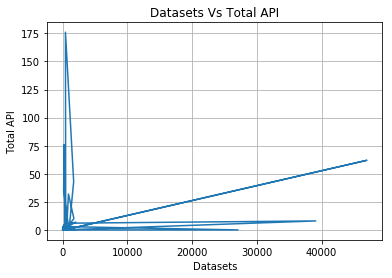

In [24]:
X = data_frame['Datasets']
Y = data_frame['Total_API']

plt.plot(X,Y)
plt.xlabel('Datasets')
plt.ylabel('Total API')
plt.title('Datasets Vs Total API')
plt.grid()
plt.show()

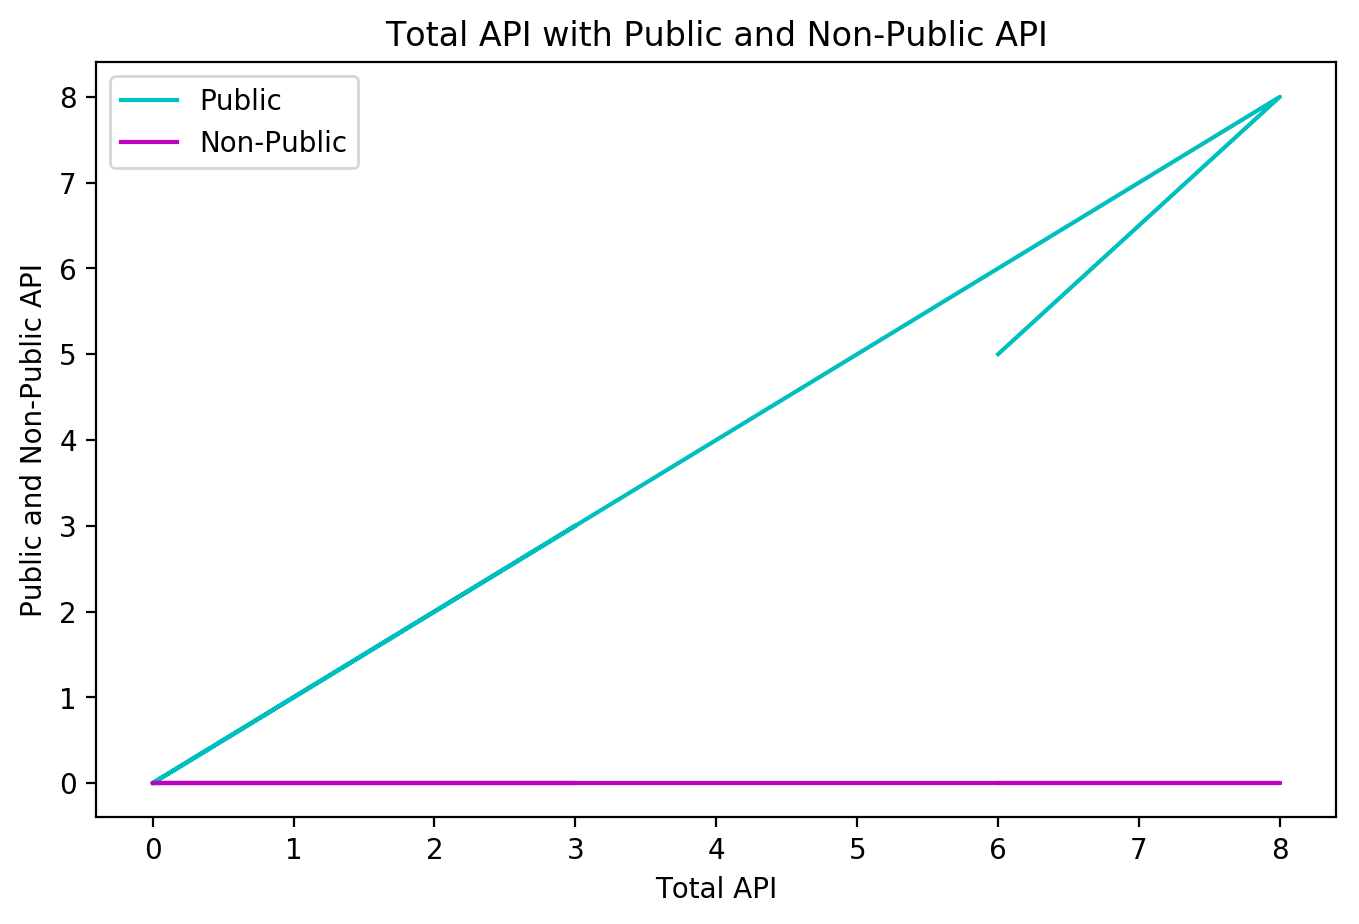

In [25]:
plt.figure(figsize = (8,5),dpi=200)

a = data_frame['Total_API'].tail(6)
b = data_frame['Public_API'].tail(6)
c = data_frame['Non_Public_API'].tail(6)
plt.plot(a,b,'c', label = 'Public')
plt.plot(a,c,'m', label = 'Non-Public')
plt.title('Total API with Public and Non-Public API')
plt.xlabel('Total API')
plt.ylabel('Public and Non-Public API')
plt.legend()
# plt.grid(color = 'b')
plt.show()

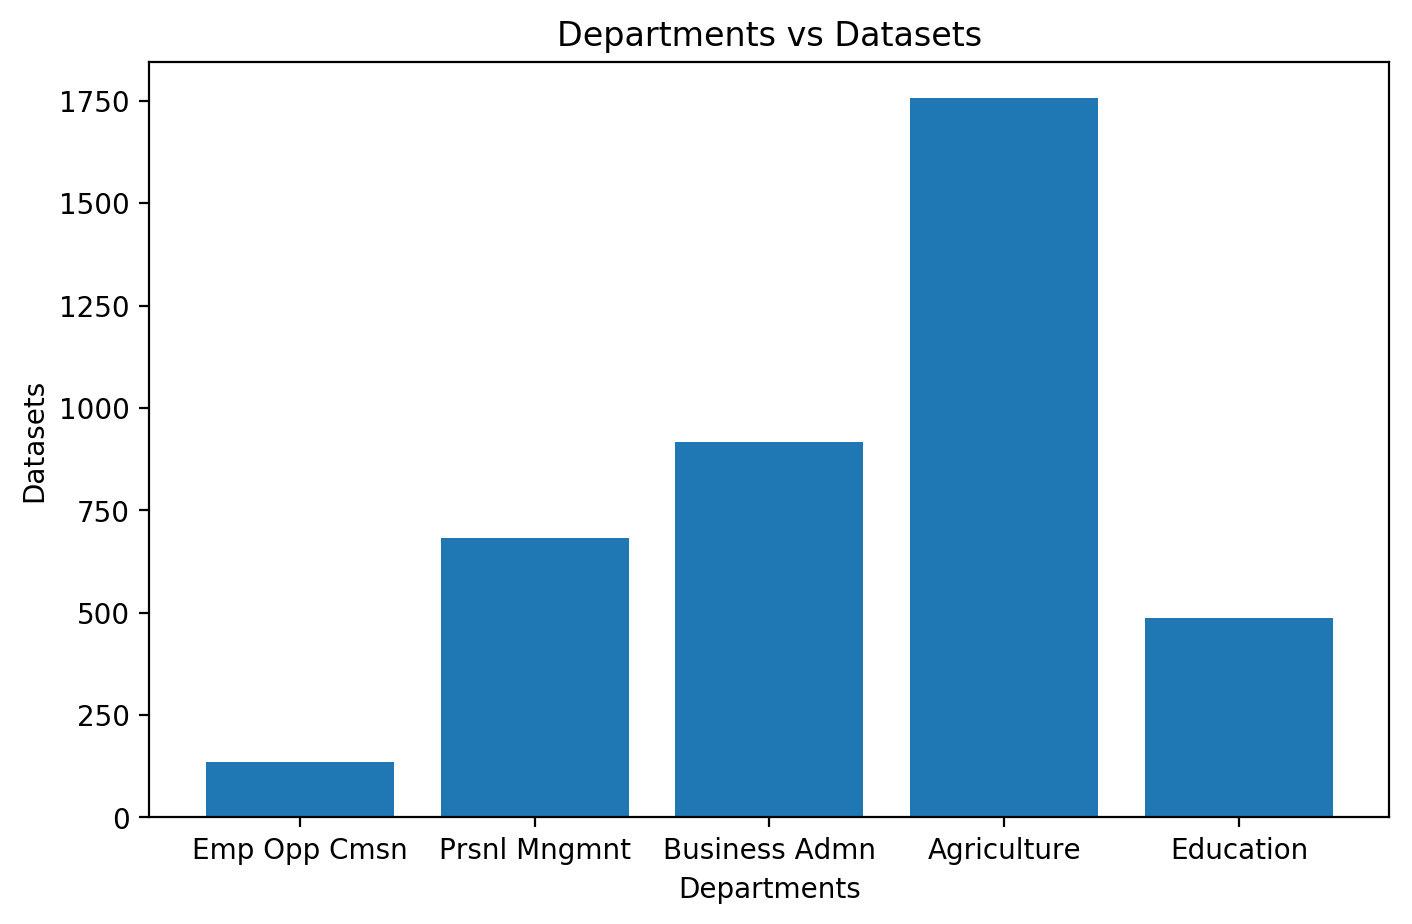

In [26]:
plt.figure(figsize = (8,5),dpi=200)


labels = data_frame['Departments'].head()
values = data_frame['Datasets'].head()
bars = plt.bar(labels,values)
plt.xlabel('Departments')
plt.ylabel('Datasets')
plt.title('Departments vs Datasets')
plt.show()

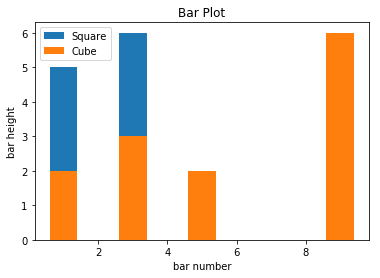

In [27]:
x1 = [1,3,5,9]
y1 = [5,6,2,3]

x2 = [1,3,5,9]
y2 = [2,3,2,6]

plt.bar(x1,y1,label='Square')
plt.bar(x2,y2,label='Cube')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('Bar Plot')
plt.show()

In [ ]:
plt.figure(figsize = (8,5),dpi=200)

x1 = data_frame['Departments'].head()
y1 = data_frame['Datasets'].head()

x2 = data_frame['Departments'].head()
y2 = data_frame['Public_Datsets'].head()

plt.bar(x1,y1,label='Datasets')
plt.bar(x2,y2,label='Public_Datsets')
plt.legend()
plt.xlabel('Departments')
plt.ylabel('DATASETS')
plt.title('Combination of Datasets and Public_Datsets')
plt.show()

In [ ]:
plt.figure(figsize = (8,5),dpi=200)

x1 = data_frame['Departments'].tail()
y1 = data_frame['Datasets'].tail()

x2 = data_frame['Departments'].tail()
y2 = data_frame['Public_Datsets'].tail()

plt.bar(x1,y1,label='Datasets')
plt.bar(x2,y2,label='Public_Datsets')
plt.legend()
plt.xlabel('Departments')
plt.ylabel('DATASETS')
plt.title('Combination of Datasets and Public_Datsets')
plt.show()

In [ ]:
plt.figure(figsize = (8,5),dpi=200)

x1 = data_frame['Departments'].head()
y1 = data_frame['Datasets'].head()

x2 = data_frame['Departments'].head()
y2 = data_frame['Non_Public_Datasets'].head()

plt.bar(x1,y1,label='Datasets')
plt.bar(x2,y2,label='Non_Public_Datasets')
plt.legend()
plt.xlabel('Departments')
plt.ylabel('DATASETS')
plt.title('Combination of Datasets and Non_Public_Datasets')
plt.show()

In [ ]:
plt.figure(figsize = (8,5),dpi=200)

x1 = data_frame['Departments'].tail()
y1 = data_frame['Datasets'].tail()

x2 = data_frame['Departments'].tail()
y2 = data_frame['Non_Public_Datasets'].tail()

plt.bar(x1,y1,label='Datasets')
plt.bar(x2,y2,label='Non_Public_Datasets')
plt.legend()
plt.xlabel('Departments')
plt.ylabel('DATASETS')
plt.title('Combination of Datasets and Non_Public_Datasets')
plt.show()

In [ ]:
restricted_public_datasets_sum = data_frame['Restricted_Public_Datasets'].sum()
print('restricted_public_datasets_sum =',restricted_public_datasets_sum)

public_dataset_sum = data_frame['Public_Datsets'].sum()
print('public_dataset_sum =',public_dataset_sum)

non_public_dataset_sum = data_frame['Non_Public_Datasets'].sum()
print('non_public_dataset_sum =',non_public_dataset_sum)

In [ ]:
dataset_sum = data_frame['Datasets'].sum()
print('dataset_sum =',dataset_sum)

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

slices = [restricted_public_datasets_sum, public_dataset_sum, non_public_dataset_sum]
labels = ['Restricted Public Datasets', 'Public Datasets', 'Non Public Datasets']
ax.pie(slices, labels= labels, autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.title('DATASETS PIE CHART')
plt.show()

In [ ]:
restricted_public_API_sum = data_frame['Restricted_Public_API'].sum()
print('restricted_public_API_sum =',restricted_public_API_sum)

public_API_sum = data_frame['Public_API'].sum()
print('public_API_sum =',public_API_sum)

non_public_API_sum = data_frame['Non_Public_API'].sum()
print('non_public_API_sum =',non_public_API_sum)

In [ ]:
API_sum = data_frame['Total_API'].sum()
print('API_sum =',API_sum)

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

slices = [restricted_public_API_sum, public_API_sum, non_public_API_sum]
labels = ['Restricted Public API', 'Public API', 'Non Public API']
ax.pie(slices, labels= labels, autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.title("API PIE CHART")
plt.show()